Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Sunny Kumar Tuladhar"
ID = "st122336"

---

# AT82.03 Machine Learning Aug 2021: Final Examination

Happy Wednesday! This is the midterm for Machine Learning in the August 2021 semester.

This exam is 2.5 hours long. Once the exam starts, you will have exactly 2.5 hours to finish your work
and upload your notebook to Google Classroom.

Please fill in this notebook with your code and short answers. Be sure to put all of your code
in the cells marked with

    # YOUR CODE GOES HERE
    
and please put your answers to the short answer questions exactly where you see the remark

*You answer goes here.*

Be complete and precise in your answers! Be sure to answer the question that's being asked. Don't dump random information in the hope that it'll give you partial credit. I give generous partial credit, but I will deduct points for answers that are not on point.

Also beware that if I discover any cheating, I will give you a 0 for the entire exam, or worse, and you will likely fail the class. Just don't do it!

OK, that's all for the advice. Relax, take a deep breath, and good luck!

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cvxopt
from sklearn.preprocessing import StandardScaler

## Question 1: Data exploration plots (10 points)

Consider the dataset below consisting of two input variables/featues and a single target variable:

In [3]:
data = [[-0.04854449138505812, 0.212806014853555, 1], [0.054809748314162826, 0.13943441492047096, 1], [0.3113230080504647, 0.18595493591760043, 1], [0.19548215573337546, -0.3706883319914649, 1], [0.003146758771761583, 0.457726826145377, 1], [-0.1588879004748391, -0.0019617656386743537, 1], [0.12568335499989805, -0.18846440320259258, 1], [0.2995930953299757, -0.020866400798681656, 1], [0.5317975031281347, 0.3031483105961126, 1], [0.16698867076343726, -0.31167320111292407, 1], [-0.14518802742481962, -0.05765225016403619, 1], [0.2204276473758933, -0.12896248529511137, 1], [-0.29180940215209605, -0.043435384925061465, 1], [0.6242978177626274, 0.6322147374160538, 1], [0.5841590323764689, -0.1433187374069571, 1], [0.3518996602888115, 0.653628889844399, 1], [0.7023311772601182, 0.701951348032853, 1], [0.10023959519673387, 0.020545554536430033, 1], [-0.1466070930471291, 0.6519777459598484, 1], [0.3240813987157458, 0.2812227576001451, 1], [0.08172989654412655, 0.6459671096841351, 1], [0.14262633859556778, 0.5820288924039037, 1], [-0.09640220839719371, 0.07937551961917727, 1], [0.45963388698061697, 0.11654844730598748, 1], [0.13422545178226925, 0.19321787705321594, 1], [0.28600049576273945, 0.019866955848141382, 1], [0.385189677974945, 0.5665468607391746, 1], [0.4484821443117948, 0.5639294458608342, 1], [0.7080619540652971, 0.22355978784609198, 1], [0.9324960453123121, 0.10196575734899316, 1], [0.5170348825671245, -0.11402691006672241, 1], [1.0808983993342371, 0.1975498993275028, 1], [0.3512562724315368, 0.03902987711017607, 1], [1.101698581600583, -0.0457012678776063, 1], [0.5241251988958415, -0.39963760269584386, 1], [1.0062480821068476, 0.0017590297198141064, 1], [0.4479997589849948, -0.10294765002924447, 1], [0.5032456111250977, -0.20522547186556622, 1], [0.6549915688729216, -0.5548846958578849, 1], [0.7093169569356323, -0.3913715258297579, 1], [1.1168078326059807, -0.4457866793973105, 1], [0.5672000629320887, 0.18830251522967073, 1], [1.1293915926285787, 0.05959302157431359, 1], [1.0024354664683157, -0.2239965848438501, 1], [1.2992733940088304, -0.0021610592668417916, 1], [0.5757973316593262, 0.03862231186877796, 1], [0.6540063625623846, -0.5710810461239433, 1], [0.5689580849410046, -0.6604982572219629, 1], [1.1130431509908254, -0.4264874292354273, 1], [1.045710792772224, -0.7903125983998085, 1], [0.4073714355704383, -0.17078131321763101, 1], [0.6907032365653683, -0.760749032235156, 1], [0.2914786222774256, -0.27017812637241745, 1], [0.8209564960130302, -1.0498704094263234, 1], [0.8957810535597682, -1.2600708372097182, 1], [0.7427246730264961, -0.8126911830441584, 1], [0.28245134672740513, -1.1999799311810775, 1], [0.7024573311531124, -1.1469288099082318, 1], [0.41329949654870757, -1.037489066448149, 1], [0.21680783113575963, -0.7937181572120973, 1], [0.10852679014212652, -0.7777229503861859, 1], [0.9952021334138138, -1.1580910803167916, 1], [0.377782549086358, -0.9847120752146109, 1], [0.7617352420240004, -1.6214364503356984, 1], [0.43008359739023666, -0.9798059317773921, 1], [0.24026860455231563, -1.712037432742714, 1], [0.5249875225162863, -1.4757015652424796, 1], [0.556884202771597, -1.1693213395820052, 1], [0.5103580302848155, -1.8249407016831127, 1], [0.09903698852450282, -1.8112597451578176, 1], [-0.2841869295021985, -1.8069299599858382, 1], [-0.2167539029095992, -1.2594831416087642, 1], [0.2532289528673598, -1.7050700611196925, 1], [0.034534783316461426, -1.4823465945435856, 1], [-0.46437234583985276, -1.260897170097512, 1], [0.04028289466146917, -1.5909149772636364, 1], [0.16177220776417628, -1.3292160731470528, 1], [-0.5474062183556236, -1.728473555963447, 1], [-0.902056928960828, -1.8835034796442418, 1], [-0.6273517568274376, -1.3210203357153336, 1], [-0.1901290242610545, -1.303653660220138, 1], [-0.7437888635834716, -1.5279769788281725, 1], [-0.6578650330312664, -1.9360929690717534, 1], [-0.36399049120388205, -0.9503996549951409, 1], [-1.018261662123738, -1.1444799358496915, 1], [-0.8751532174824501, -1.354856792996966, 1], [-1.1063368570021135, -1.0269171603328708, 1], [-1.1487743291544315, -1.7987599523941251, 1], [-1.4007783092221298, -1.2240902429230553, 1], [-1.278798172813186, -0.8303964049186163, 1], [-1.1836032786537345, -1.7166552990470993, 1], [-0.9580674479870742, -1.4620807348475071, 1], [-1.209749993660423, -0.9614834770361054, 1], [-1.6811580109939488, -1.4799381440565882, 1], [-1.761078142918985, -1.1111000095879253, 1], [-1.2637056711008117, -1.0244880317798035, 1], [-1.8082187694601508, -0.6617813848118432, 1], [-1.6156173575737904, -0.7165341972972934, 1], [-1.6238175873628862, -0.37871543873491664, 1], [-1.906523759254078, -0.2270092661728963, 1], [-1.4679652641977698, -0.12140533346036542, 1], [-2.377200698769925, -0.9671994436378362, 1], [-2.056700298474672, -0.5928786641729112, 1], [-2.0672835214928744, -0.4316715559929791, 1], [-2.332452139271653, -0.3888062980751451, 1], [-2.554499130282383, -0.25844194608439236, 1], [-2.5713127225384467, -0.4183220611586249, 1], [-1.7738769042157503, -0.4080493857998166, 1], [-1.8909477185473484, 0.5093100687003292, 1], [-1.9173397199947415, 0.6490513179521942, 1], [-2.32968771157802, -0.08907441241565356, 1], [-2.6697565863558563, 0.22406799478023026, 1], [-2.5793751732314076, 0.4973070045298419, 1], [-2.0682118911985015, 0.39883420054173735, 1], [-2.6242309382807267, 0.4795988683375011, 1], [-2.1907763269730043, 0.5049225804509627, 1], [-2.0402437598753047, 1.14324091976213, 1], [-2.281996584510955, 0.7644166660045196, 1], [-1.988485950024689, 1.1316893442570355, 1], [-2.2229402250379815, 1.2818677295433654, 1], [-1.7162936343120392, 1.7163294219604652, 1], [-2.4670065136262735, 1.052431858175023, 1], [-1.598415694288108, 1.2520464515847898, 1], [-1.519258019436009, 1.1296099784421707, 1], [-1.4946384619289321, 1.5237994523077707, 1], [-1.7144710520836122, 1.8965165679549507, 1], [-1.7886903552062328, 2.237736261452438, 1], [-1.5131885886418575, 2.255607595332327, 1], [-1.5643470545372056, 1.8183057964893217, 1], [-1.7022821620228945, 1.6888682465457532, 1], [-0.9798335346208549, 2.04497082347537, 1], [-1.6097668911689682, 2.1219755437933028, 1], [-1.049317633237722, 2.0721963288893215, 1], [-1.0811407438084841, 2.16431548098127, 1], [-1.2834022373739589, 2.2085256686216534, 1], [-0.80893720755137, 2.127717794992943, 1], [-1.152999944189252, 2.3457378150074493, 1], [-1.1529844394366604, 2.7539718644124, 1], [-0.2906874433117317, 2.5958827231948334, 1], [-0.48894274831198753, 3.105139397508821, 1], [-0.2467507286470536, 2.6665819324859332, 1], [-0.0677096512507751, 2.9332455843784535, 1], [0.2523124903036492, 2.7426125048799634, 1], [0.5109296146634743, 2.442296497360008, 1], [-0.2270647955821498, 3.1359286288572674, 1], [0.37872040734606105, 3.2100583530866773, 1], [0.06753832820949662, 3.089732882296194, 1], [0.9436036668895932, 2.5689132135802524, 1], [0.20380550174844025, 3.048417683387475, 1], [0.5741670267118156, 2.8639141194382214, 1], [1.0266493394183343, 2.59596744815397, 1], [1.4872692468258863, 2.5297574195158594, 1], [1.6540045102029253, 2.3070323869863514, 1], [1.6394876189843375, 3.0760843911160745, 1], [1.5785474634279038, 2.390487335601192, 1], [1.6711732490175892, 2.9528031718568037, 1], [2.072559931779275, 2.6649047738062, 1], [1.8261739514435766, 2.7807614087990884, 1], [2.073782900172696, 2.6807361934540053, 1], [1.7834885084587495, 2.553262152433005, 1], [1.9680586199543013, 2.0063870244803077, 1], [2.3965105121146335, 2.4865983201567188, 1], [2.9068839470340953, 2.0092897662711584, 1], [2.7751439072322515, 1.5839999511084613, 1], [2.2708024575234234, 2.461090833107279, 1], [2.431787424526272, 2.233521685471153, 1], [2.925875174428936, 1.4594798657901826, 1], [2.884039700412449, 1.1588960481034842, 1], [3.18296588440203, 1.0736162489609098, 1], [3.5357970636862968, 1.5450302882011027, 1], [3.1427550161745037, 1.0171569053545575, 1], [3.4436139123452363, 1.6026542398067427, 1], [3.4106612722986203, 0.8927450217531678, 1], [3.10746230667866, 1.026087986977195, 1], [3.639616730592049, 0.5001329836131285, 1], [3.2211214772058883, 0.8750075181687683, 1], [3.359170378174272, 0.45645885019151744, 1], [3.9598087793975347, -0.09327623182399244, 1], [3.5902846703540776, 0.2953375170379011, 1], [3.892594245536312, -0.14232801598898626, 1], [3.208834433177035, -0.3497470057603367, 1], [3.673542254383017, -0.11276754968464653, 1], [3.9249950104052376, -0.9781094956678634, 1], [3.110069076227019, -0.7873473467611611, 1], [3.788196275335668, -0.3940829661810197, 1], [3.9987197157342345, -1.3741617436490816, 1], [3.761168156076863, -1.1243932481848251, 1], [3.6778304452033534, -1.7749027523608762, 1], [3.940728364804303, -1.9687720192340223, 1], [2.9678152157229585, -1.7289706634905004, 1], [3.716193657732594, -2.198064633461005, 1], [3.0401170409679907, -2.347079108179521, 1], [3.641145035569216, -2.5830640278279446, 1], [3.319933059962808, -2.689987128556017, 1], [3.4485892413317107, -2.2453092772262595, 1], [2.657279553694127, -2.836938047740822, 1], [2.3238680895789656, -2.3731159819079135, 1], [3.07768179447891, -2.5251551930822416, 1], [2.634671590227112, -2.7857914816335154, 1], [2.480108789569392, -2.7601428911328445, 1], [2.1061983227761516, -3.6305233487556188, 1], [1.9646893348992434, -3.179352057291612, 1], [1.8786352795320906, -3.4931074551678503, 1], [1.5696721981568595, -3.9527009730553595, 1], [1.9195588675651845, -3.7983677932260593, 1], [1.2847916456631592, -4.148158388916798, 1], [1.7331229219957298, -3.983035497479716, 1], [1.519061549595336, -4.165536079965024, 1], [0.7591311084566216, -4.14333123690724, 1], [0.5509508681034843, -4.4269902519832875, 1], [0.9334671004269236, -4.206706330893442, 1], [1.0379290530559595, -4.194004432642196, 1], [-0.06101303200457053, -4.131543002582964, 1], [0.09593241867634186, -3.8864160415761098, 1], [-0.2682070767917146, -4.171811178938285, 1], [-0.18794388577065343, -3.851511693203721, 1], [-0.048583015075304326, -4.645671498001556, 1], [-0.3663625137113926, -4.44746126750064, 1], [-1.1831150689916448, -4.1592262723700895, 1], [-0.9826236940806039, -4.675204965272711, 1], [-0.9266987832835505, -4.618252285934106, 1], [-1.6615404168943015, -4.198613371489077, 1], [-1.3087482313231604, -3.9461447004549672, 1], [-1.6518824305609532, -3.9353959232980653, 1], [-2.1453809833275477, -4.383074121550716, 1], [-2.2441214008637846, -3.6014357813299993, 1], [-2.696427604401087, -3.9230531092417897, 1], [-2.5371630234378917, -3.5702743655899685, 1], [-2.6881414631311324, -3.833596460690706, 1], [-3.1849507695551624, -3.528542761638488, 1], [-3.2192242489214293, -3.1663049444413667, 1], [-2.886020127302828, -3.7089270645596093, 1], [-2.786615517935979, -3.5119051423720915, 1], [-3.8983724732925094, -3.2200757551218318, 1], [-3.6747623899475164, -3.4720663409480395, 1], [-3.4496579754592585, -3.1598940383600707, 1], [-3.5536738118611146, -2.3477889904599767, 1], [-4.395806248826131, -2.6819304149398633, 1], [-4.207608957210868, -1.9909983776124123, 1], [-4.43807579851613, -2.431523655603529, 1], [-4.1133879124436605, -2.084385362270522, 1], [-4.562035966501292, -1.8288064123745102, 1], [-4.921906857645215, -1.3883048969397844, 1], [-4.397760456683037, -1.7465858779040744, 1], [-4.846628592423755, -1.368564931008358, 1], [-4.331745126947112, -0.5862549792154853, 1], [-4.7804302681515, -0.8467126072024186, 1], [-5.331685770354516, -0.35248660652016517, 1], [-5.373261024242352, -0.6129223130927685, 1], [-5.390137591758545, -0.3590880357264702, 1], [-0.45072720274737144, -0.18683918647213404, -1], [-0.1731124596220088, -0.32715858487094507, -1], [0.13520911839323177, -0.3143433279416729, -1], [-0.15785196477134164, 0.13144427959270266, -1], [0.28827165282031636, 0.2666945689915617, -1], [-0.3902004692310689, -0.41086602844887554, -1], [0.39740363624952457, 0.2986138023106988, -1], [0.4423271079773865, 0.14472616398902374, -1], [0.3558712697805026, -0.2566364968425521, -1], [-0.01366415436552551, 0.1703759339689566, -1], [0.28719721323981184, -0.3444889875235967, -1], [-0.24604677046811088, -0.47942629747455057, -1], [-0.09368558027035626, -0.6415252947667587, -1], [0.09225988202088845, 0.28104998428352107, -1], [0.2230422045615788, -0.12018322919488328, -1], [-0.6667436490271101, -0.6789901687970339, -1], [-0.10413006146005466, -0.34007444991071134, -1], [0.06275987160439722, -0.5654378171647947, -1], [-0.28331614744372785, 0.14787488317757297, -1], [-0.6241050293948478, -0.6410374597212978, -1], [-0.47188433875893787, -0.02780131317606399, -1], [-0.3174758678914362, -0.5094745387213293, -1], [-0.17169876363125358, -0.6781217984170257, -1], [-0.04651087331600323, 0.07632227281132434, -1], [-0.6733372654908015, -0.6060815277943465, -1], [-0.8997429697671574, -0.5590835063654781, -1], [-0.8984732738549942, -0.03118236574908481, -1], [-0.5141425631638395, -0.3333584921664894, -1], [-0.804253316681803, -0.4517385898607533, -1], [-0.882225299774345, -0.46196044794950203, -1], [-0.9565905005523521, 0.1714073614615486, -1], [-0.5798558001016785, -0.10908593233736014, -1], [-0.7684900128346266, -0.022403177768926585, -1], [-0.9292552475803763, -0.049553156664719544, -1], [-0.4360926369506809, -0.009427770985300898, -1], [-1.0419591158821968, -0.48854789356139094, -1], [-0.5828114444960488, 0.12345345961048221, -1], [-0.3947201430320073, -0.1363565171350201, -1], [-1.159698056934503, 0.15323778655250703, -1], [-0.4885211997898342, 0.20935162402790786, -1], [-1.0614090015496767, -0.2502400059798109, -1], [-0.520686415002199, 0.36337671225202683, -1], [-0.3948661808192736, 0.1955006173568317, -1], [-0.6121211627847283, 0.44078683503521005, -1], [-0.9311140866485782, -0.015060019471747788, -1], [-0.7928820012363162, 0.7751792243967334, -1], [-0.46793262590167695, 0.2952604077206308, -1], [-0.909335878540879, 0.758843577410957, -1], [-0.4107772607300402, 0.5608900704528659, -1], [-0.955729541532242, 0.6778271761156927, -1], [-0.7882815420736754, 0.9022957926160363, -1], [-0.7769737415131249, 0.3426140485557889, -1], [-0.7930303394939421, 0.8562074320761396, -1], [-0.9908441488622264, 0.47748028107702123, -1], [-0.65355493679984, 0.8939121642917591, -1], [-0.2706762404935539, 0.5448961042373598, -1], [-1.136688200534467, 1.2515698034688447, -1], [-0.6945505860222373, 0.5395640802060113, -1], [-1.084498918784487, 0.6288496467974908, -1], [-0.30731819750912415, 1.389623912878362, -1], [-0.34015202995709626, 0.7944767575800974, -1], [-0.0853833950396613, 0.626770671523173, -1], [-0.33715816496411594, 0.7912570830912247, -1], [-0.11544613576695184, 1.6261752367904032, -1], [-0.20118958172803109, 1.407776902522254, -1], [-0.52067131550915, 1.0727152389411727, -1], [-0.5277194189762127, 1.0038137173736588, -1], [-0.2604767500172669, 0.8800843560930247, -1], [0.13185657274617882, 1.6749404535737196, -1], [0.042541069108620766, 1.5722503451553287, -1], [0.19095231289096767, 1.4553416580587721, -1], [0.09506573458149903, 1.7590863902278577, -1], [0.44725937830788015, 1.4194753860725289, -1], [0.3917629978743146, 1.5807776803594176, -1], [0.28618561229589223, 1.3622622944200402, -1], [-0.16780074420316765, 1.9165789120490193, -1], [0.4479108698414298, 1.7037459710665521, -1], [0.7972810719288987, 1.000767008813348, -1], [0.023694446674740466, 1.862514630702814, -1], [0.8819873638027038, 1.6587532429594827, -1], [0.6547197083663066, 1.4646879129997046, -1], [0.22662804010626236, 1.6721066895537628, -1], [0.41119778880686497, 1.4480168283493193, -1], [1.271097709111527, 1.9458596134227357, -1], [1.0325187943553988, 1.349079377383656, -1], [0.9709927800249686, 1.3927372300949132, -1], [0.5639483686694058, 1.7706296162555775, -1], [1.4954507815020082, 0.9619257093413276, -1], [1.1415040506160827, 1.4337684593306146, -1], [0.9331980487590473, 1.4514024315708953, -1], [1.7519630199319314, 0.8814649470590574, -1], [1.7447460527800047, 1.0414647967535484, -1], [0.947702338926221, 1.1507017786087284, -1], [1.0881663558668049, 1.0741767791447727, -1], [1.2130783485019827, 0.7562530589964923, -1], [1.354173822806346, 1.0210623486599375, -1], [2.085042923180554, 0.7817366595483161, -1], [1.756987075401038, 0.4998932271249691, -1], [1.853727772685419, 1.053747978787166, -1], [1.6046282226316695, 0.22704546328930908, -1], [1.8368706338764103, 0.4177505209579856, -1], [2.1914007268439515, 0.8138030043778332, -1], [2.163316692411847, 0.345229853111199, -1], [1.8370144286415848, 0.06011862084295427, -1], [2.1788858632980532, 0.4741692870792124, -1], [1.7572002702091043, -0.23257351699729814, -1], [2.040389975018595, 0.330288880089485, -1], [2.36503535115274, -0.24999548091580248, -1], [2.0074012339251994, 0.1162822666966386, -1], [2.3752474194196793, 0.008485996379756278, -1], [2.1092490690384653, -0.3643120283662768, -1], [1.916258428589396, 0.0007730909481128978, -1], [1.9654001635087128, -0.7669263931863763, -1], [2.343629076387024, -0.5412190997235778, -1], [2.1456805420794893, -0.8377207318454514, -1], [1.7490603772898685, -0.5838931882512385, -1], [2.450191502512148, -0.40709999770682104, -1], [1.987623774355034, -1.38776545908194, -1], [2.1435796305988024, -1.5439710886157005, -1], [2.0132437523472206, -0.8637869670677498, -1], [1.5773207631531792, -1.6234338667887127, -1], [1.9563691546071422, -1.0711168996305593, -1], [1.92315888616936, -1.6870292827666795, -1], [2.2107619989079392, -1.9606184417201429, -1], [2.2757653913437275, -1.3716996077600243, -1], [1.5225347245211074, -2.091320028420009, -1], [2.067939611452262, -1.936180300680675, -1], [1.8255075244199155, -1.5280999870186645, -1], [1.5904350587262983, -1.5662517170780794, -1], [0.9864421211743212, -1.9984574980467336, -1], [1.8389698420533152, -2.5399831653705705, -1], [1.7019289978466108, -2.494307505918421, -1], [0.8543633267488722, -2.8198897031688794, -1], [1.0361913948059973, -2.2178288410519476, -1], [0.8620413778659142, -2.2181707652069105, -1], [0.5533409035352707, -2.378169128046137, -1], [1.0250311934586485, -2.7133919329163083, -1], [0.42659846806984136, -3.124029728134202, -1], [0.20786904226636171, -3.195236520677778, -1], [0.9008825848262715, -2.2435664144493024, -1], [0.5111059348447292, -2.9057292094127036, -1], [0.41951784018277394, -3.023510852094522, -1], [-0.04800374623573611, -2.519346153089457, -1], [-0.24153769269928754, -2.638702482130912, -1], [-0.48952537598089335, -2.6195712186213074, -1], [-0.03134911220151282, -3.3202830034632167, -1], [-0.2795365553526601, -2.4172771034219274, -1], [-0.40413393112838947, -2.894675111147258, -1], [-0.3346711436059986, -3.0178642039456007, -1], [-0.3211257261977103, -2.6200427408516145, -1], [-1.2910373374473176, -2.498146301371675, -1], [-1.4034648088728328, -2.8719577678697945, -1], [-1.347649220400215, -3.2429207620571328, -1], [-0.8884981727813352, -2.695640844022006, -1], [-1.6324502801566108, -2.602664395630711, -1], [-1.273607911898297, -2.5567314144061504, -1], [-1.7137546634337384, -2.1704577300464307, -1], [-1.6616188550633875, -2.983470558596232, -1], [-2.342023501498593, -2.8278203360999394, -1], [-1.9954937724001711, -2.850227172800518, -1], [-2.1483817069598365, -2.6721088538150206, -1], [-2.305926445597562, -2.277202410411666, -1], [-2.8679196440549735, -2.22677696094875, -1], [-2.4903296671451187, -2.328692769490338, -1], [-2.702442911102704, -2.3433875367704875, -1], [-2.2609839751644953, -2.1757050954012436, -1], [-3.1243916763506094, -2.079768026410481, -1], [-2.6274079633199694, -1.2700626609856172, -1], [-3.0843529280320183, -1.514500593345662, -1], [-3.3392039896845427, -1.0172685853331225, -1], [-3.172974994606808, -1.6879147603977644, -1], [-2.9701049056169095, -1.2068546539909795, -1], [-3.643516124627196, -1.1664066491579492, -1], [-3.5785837795899114, -0.5817126305740807, -1], [-3.353598202059559, -1.0524045534892101, -1], [-3.927823296553745, -0.44167673556068365, -1], [-3.85554981033294, -0.1743693284757033, -1], [-3.416563962423993, 0.08140059209196648, -1], [-3.289803856615632, 0.38804021903587793, -1], [-3.7472110732396486, -0.3837809068959832, -1], [-3.391383974167457, 0.07358823629918196, -1], [-3.2471001003091136, 0.31067828410717385, -1], [-3.204429136021635, 0.7402078706672363, -1], [-3.8915046775593067, 0.5041957182418226, -1], [-3.4959010936606685, 1.177344980731689, -1], [-3.7319194224439083, 0.9589801874435185, -1], [-3.875155352412479, 1.2356736532403514, -1], [-3.0833912094397466, 1.4220317201190906, -1], [-3.1881074632401996, 1.0379923546889258, -1], [-2.9315681862410155, 1.8685503504891945, -1], [-2.9987819469972643, 1.7400901480615576, -1], [-3.247308994900123, 1.8986138581279164, -1], [-2.967100490434749, 2.463099048930381, -1], [-2.758864055178926, 2.1341250195798054, -1], [-3.4875102763477455, 2.048497570132815, -1], [-3.2993289415749634, 2.6371434946590355, -1], [-3.196010624099029, 2.716202552615759, -1], [-2.372530236441007, 2.669777508624578, -1], [-2.4758769519634947, 3.323584854867165, -1], [-2.3335377139022757, 3.105483290673379, -1], [-2.640448423549005, 3.5977837171524496, -1], [-2.1760065893831713, 3.2577795150862126, -1], [-2.4276759942403494, 3.724116545507358, -1], [-1.4769676200917476, 3.5686066740589553, -1], [-1.298233562028376, 3.5692388624863582, -1], [-1.8922620570269717, 3.9694898959358342, -1], [-1.0756683825241673, 3.9284361058513535, -1], [-1.2511843940250675, 4.054959036600319, -1], [-1.5674073976116025, 3.626527137389355, -1], [-1.3522544182019318, 3.702680869079639, -1], [-0.42204623917079287, 4.444549133629565, -1], [-0.10957628244891282, 4.379342939302853, -1], [-0.4762092592433861, 4.074523750289086, -1], [-0.29209116775825883, 4.16469686998676, -1], [0.016213306974264964, 4.267538465825043, -1], [0.21149745003043907, 3.920483283054626, -1], [0.29487309733121914, 4.317362398958934, -1], [0.632016977887336, 4.396352449773952, -1], [0.5572166371657196, 3.807871456296029, -1], [0.6367938117727804, 4.338093193189427, -1], [0.7688479068254663, 4.477426976383363, -1], [0.986189646314898, 3.879109483417067, -1], [1.5742910086362936, 4.297835167475141, -1], [2.099090448434631, 3.8466458505130046, -1], [1.845568432842922, 3.876657278001783, -1], [1.9936601136007925, 4.115327464387498, -1], [2.023766108098714, 4.289486090940193, -1], [2.491527532864059, 4.049611747219568, -1], [2.1006922788744404, 3.6985495620121185, -1], [3.149073900162519, 4.033775468854729, -1], [3.0616431034442955, 3.7729701938556106, -1], [3.0000830014240747, 3.6306654933530806, -1], [3.112523391764825, 2.8035696057961355, -1], [3.8602694424139576, 2.930113399149593, -1], [3.0901865368868746, 2.6305480662407854, -1], [4.0693209083460555, 2.67902275289514, -1], [3.7187347115731075, 3.0261662169039365, -1], [3.7268033429421807, 2.381166463874618, -1], [4.253899469440418, 2.3312815275606624, -1], [4.226007844614248, 2.400982075020465, -1], [4.658533621873059, 2.04198471913426, -1], [4.943041058709358, 2.066109412719043, -1], [4.87479831813466, 1.395674476315787, -1], [4.941396323411314, 1.1563338475344882, -1], [4.648230411660068, 0.8404068448780428, -1], [5.228109827178619, 0.6617264038915005, -1], [4.85793112406844, 1.2279447878859733, -1], [4.646888081879075, 1.1416695279907227, -1], [4.5822650840973145, 0.4271863250676769, -1], [4.730008020560678, -0.029977063533882353, -1]]


In the cell below, write code to split the data into training and validation sets in an 80%/20% ratio, then make two scatterplots, each showing the training set or validation set, with the two classes in different colors.

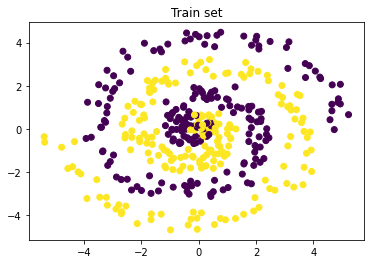

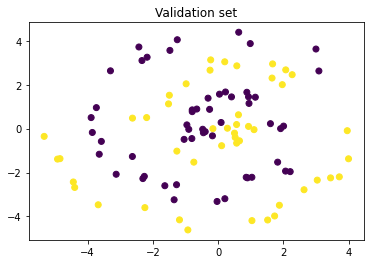

In [4]:
# YOUR CODE GOES HERE
data = np.array(data)
data.shape
X = data[:,:-1]
y = data[:,-1]

train_size = 0.8
idx = np.arange(0,y.shape[0])
np.random.seed(1993)
np.random.shuffle(idx) 
m = X.shape[0]
idx_train = idx[0:round(train_size*len(X))]
idx_test = idx[len(idx_train):]    
X_train = X[idx_train]
y_train = y[idx_train]
X_test = X[idx_test]    
y_test = y[idx_test]

plt.scatter(X_train[:,0],X_train[:,1],c = y_train)
plt.title('Train set')
plt.show()
plt.scatter(X_test[:,0],X_test[:,1],c = y_test)
plt.title('Validation set')
plt.show()

## Question 2: RBF SVM model (30 points)

Use the RBF SVM code (Gaussian kernel) we developed in lab using cvxopt to find a good model that performs well on the validation set. Visualize the result, showing the validation set with the -1/+1 regions of the input space shown in different colors.

You may normalize the data if you find it necessary.


In [5]:
# YOUR CODE GOES HERE

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

def cvxopt_solve_qp(Q, c, A=None, B=None, E=None, d=None):
    # Fill your code value in 'None'
    # Some 'None' can be avoided.
    Q_new = (Q +Q.T)/2

    args =[cvxopt.matrix(Q_new),cvxopt.matrix(c)]
    if A is not None:
        args.extend([cvxopt.matrix(A),cvxopt.matrix (B)])
        if E is not None:
            args.extend([cvxopt.matrix(E), cvxopt.matrix(d)])
    sol = cvxopt.solvers.qp(*args)
    if sol is not None and 'optimal' not in sol['status']:
        return None
    
    x = (sol['x'].T)
    x = np.array(x).reshape(-1,)
    # YOUR CODE HERE
    #raise NotImplementedError()
    return x

def preprocess(X):
    means = X.mean(0);
    scales = 1/np.std(X,0);
    Xh = np.concatenate([X.T,np.ones([1,20])],0);
    Tm = np.matrix(np.eye(3));
    Tm[0:2,2:3] = -X.mean(0).T;
    Ts = np.matrix(np.eye(3));
    Ts[0:2,0:2] = np.diagflat(scales);
    T = Ts*Tm;
    XX = (T * Xh);
    XX = XX[0:2,:].T;
    return XX, T;

# RBF/Gaussian kernel

def gauss_kernel(X):
    sigma = 0.2
    m = X.shape[0];
    K = np.matrix(np.zeros([m,m]));
    for i in range(0,m):
        for j in range(0,m):
            K[i,j] = (X[i,:] - X[j,:]).reshape(1,-1) @ (X[i,:] - X[j,:]).reshape(-1,1)
    K = np.exp(-K/(2*sigma*sigma))      
    return K;

def predict(x, X, y, alpha):
    s = []
    sigma = 0.2
    for j in range(x.shape[0]):
        ss = 0
        for i in range(X.shape[0]):
            ss += alpha[i]*y[i]*np.exp((-(X[i]-x[j])@(X[i]-x[j]))/(2*sigma*sigma))
        s.append(ss)
    s = np.array(s)
    s[s >= 0] = 1
    s[s < 0] = -1
    return s

m = X_train.shape[0];
n = X_train.shape[1];
K = gauss_kernel(X_train)
Q = np.multiply(y_train * y_train.T, K)
c = -np.ones([m])
A = -np.eye(m).astype('float')
B = np.zeros([m])
E = y_train.T
d = np.zeros(1)

alpha_star = cvxopt_solve_qp(Q, c, A, B, E, d)

     pcost       dcost       gap    pres   dres
 0: -1.0448e+02 -3.9640e+02  3e+02  3e-15  3e+00
 1: -1.3614e+02 -2.6332e+02  1e+02  9e-15  1e+00
 2: -2.8303e+02 -4.2279e+02  1e+02  7e-15  1e+00
 3: -7.4642e+02 -9.2321e+02  2e+02  2e-14  1e+00
 4: -1.1519e+03 -1.3591e+03  2e+02  2e-13  1e+00
 5: -3.4670e+03 -3.8667e+03  4e+02  3e-13  1e+00
 6: -3.8332e+03 -4.2609e+03  4e+02  3e-13  1e+00
 7: -6.6598e+03 -7.3073e+03  6e+02  1e-12  1e+00
 8: -1.2984e+04 -1.4411e+04  1e+03  7e-13  1e+00
 9: -2.9493e+04 -3.4510e+04  5e+03  3e-12  9e-01
10: -6.2335e+04 -7.8770e+04  2e+04  6e-12  7e-01
11: -8.1003e+04 -8.7345e+04  6e+03  3e-11  4e-02
12: -8.0948e+04 -8.1256e+04  3e+02  3e-11  4e-04
13: -8.1019e+04 -8.1046e+04  3e+01  2e-11  7e-06
14: -8.1021e+04 -8.1039e+04  2e+01  1e-11  3e-06
15: -8.1024e+04 -8.1027e+04  3e+00  2e-11  4e-07
16: -8.1025e+04 -8.1025e+04  4e-01  2e-11  5e-08
17: -8.1025e+04 -8.1025e+04  5e-02  2e-11  3e-09
Optimal solution found.


In [6]:
y_pred = predict(X_test, X_test, y_test, alpha_star)
accuracy = np.sum(y_test == y_pred)/y_test.size
accuracy

0.99

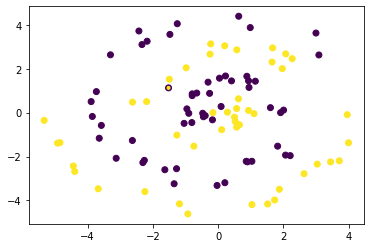

In [7]:
plt.scatter(X_test[:,0],X_test[:,1],c = y_pred) #big  dot is predicted value
plt.scatter(X_test[:,0],X_test[:,1],c = y_test,marker = '.') #Small dot is actual value

In [8]:
X1 = X_test[y_pred[:,0] == 1]
X2 = X_test[y_pred[:,0] == -1]
X1.shape

(45, 2)

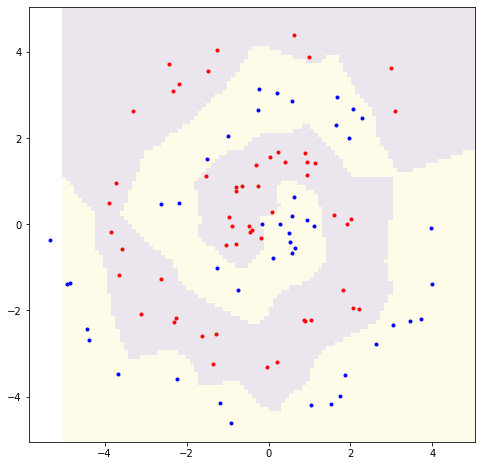

In [9]:
x_series = np.linspace(-5, 5, 100)
y_series = np.linspace(-5, 5, 100)

x_mesh, y_mesh = np.meshgrid(x_series, y_series)

x_mesh = x_mesh.reshape(-1, 1)
y_mesh = y_mesh.reshape(-1, 1)

mesh = np.append(x_mesh, y_mesh, axis=1)
y_pred = predict(mesh, X_test, y_test, alpha_star)

x_mesh = x_mesh.reshape(100, 100)
y_mesh = y_mesh.reshape(100, 100)
y_pred = y_pred.reshape(100, 100)

fig1 = plt.figure(figsize=(8,8))
plt.plot(X1[:,0],X1[:,1], 'b.')
plt.plot(X2[:,0],X2[:,1], 'r.')
plt.pcolormesh(x_mesh, y_mesh, y_pred, cmap='viridis', shading='auto', alpha=0.1)
plt.show()

## Question 3: Neural network model (30 points)

In our deep learning lab, you already found neural networks in the Tensorflow Playground capable of learning this dataset. Using the code developed in lab, find a good multilayer neural network model that performs well on the validation set. Visualize the result, showing the validation set with the -1/+1 regions of the input space shown in different colors.

You may normalize the data if you find it necessary.


In [10]:
#### YOUR CODE GOES HERE
import torch
from torch import nn
import torch.optim as optim
from torch.autograd import Variable
from torch.nn import functional as F

#adding new features X1, X2, X1^2, X2^2, X1xX2, sin(X1), sin(X2)
#as we did in the tensorflow playground

X_train_new = np.array([X_train[:,0],X_train[:,1],
               X_train[:,0]**2,
               X_train[:,1]**2,
               X_train[:,0]*X_train[:,1],
              np.sin(X_train[:,0]),
              np.sin(X_train[:,1])]).T

X_test_new = np.array([X_test[:,0],X_test[:,1],
               X_test[:,0]**2,
               X_test[:,1]**2,
               X_test[:,0]*X_test[:,1],
              np.sin(X_test[:,0]),
              np.sin(X_test[:,1])]).T

X_train_tensor = torch.FloatTensor(X_train_new)
X_test_tensor = torch.FloatTensor(X_test_new)
y_train_tensor = torch.FloatTensor(y_train)
y_test_tensor = torch.FloatTensor(y_test)


class NNetwork(nn.Module):
    
    def __init__(self):
        super(NNetwork, self).__init__()
        # YOUR CODE HERE
        self.l1 = nn.Linear(7, 128)
        self.l3 = nn.Linear(128, 64)
        self.l5 = nn.Linear(64, 32)
        self.l6 = nn.Linear(32, 16)
        self.l7 = nn.Linear(16, 1)
        
        
    def forward(self, x):
        # YOUR CODE HERE
        x = self.l1(x)
        x = torch.relu(x)
        x = self.l3(x)
        x = torch.relu(x)
        x = self.l5(x)
        x = torch.relu(x)
        x = self.l6(x)
        x = torch.relu(x)
        x = self.l7(x)
        x = torch.relu(x)
        return torch.sigmoid(x)

net1 = NNetwork()
print(net1)

optimizer = optim.Adam(net1.parameters(), lr=0.0001)
loss_func = nn.BCELoss()

loss_log = []
test_loss_log = []

batch_size = 256

epochs = 1000
for e in range(epochs):
    for i in range(0, X_train_tensor.shape[0], batch_size):
        x_mini = X_train_tensor[i:i + batch_size] 
        y_mini = y_train_tensor[i:i + batch_size] 
        
        x_var = Variable(x_mini)
        y_var = Variable(y_mini)
        
        x_test_var = Variable(X_test_tensor)
        y_test_var = Variable(y_test_tensor)
        
        optimizer.zero_grad()
        net_out = net1(x_var)
        
        loss = loss_func(net_out, y_var.reshape(-1,1))
        loss.backward()
        optimizer.step() 
        
        test_net_out = net1(x_test_var)
        test_loss = loss_func(test_net_out, y_test_var.reshape(-1,1))
        
        if i % 100 == 0:
            loss_log.append(loss.item())
            test_loss_log.append(test_loss.item())                 
                              
    if e % 100 == 0:    
        print('Epoch: {} - Loss: {:.6f} -- test loss: {:.6f}'.format(e, loss.item(),test_loss.item()))



NNetwork(
  (l1): Linear(in_features=7, out_features=128, bias=True)
  (l3): Linear(in_features=128, out_features=64, bias=True)
  (l5): Linear(in_features=64, out_features=32, bias=True)
  (l6): Linear(in_features=32, out_features=16, bias=True)
  (l7): Linear(in_features=16, out_features=1, bias=True)
)
Epoch: 0 - Loss: 0.702638 -- test loss: 0.706059
Epoch: 100 - Loss: 0.689282 -- test loss: 0.691637
Epoch: 200 - Loss: 0.672031 -- test loss: 0.686289
Epoch: 300 - Loss: 0.589694 -- test loss: 0.652997
Epoch: 400 - Loss: 0.539180 -- test loss: 0.633903
Epoch: 500 - Loss: 0.525652 -- test loss: 0.629400
Epoch: 600 - Loss: 0.521324 -- test loss: 0.637229
Epoch: 700 - Loss: 0.519041 -- test loss: 0.635836
Epoch: 800 - Loss: 0.517805 -- test loss: 0.632252
Epoch: 900 - Loss: 0.516993 -- test loss: 0.634687


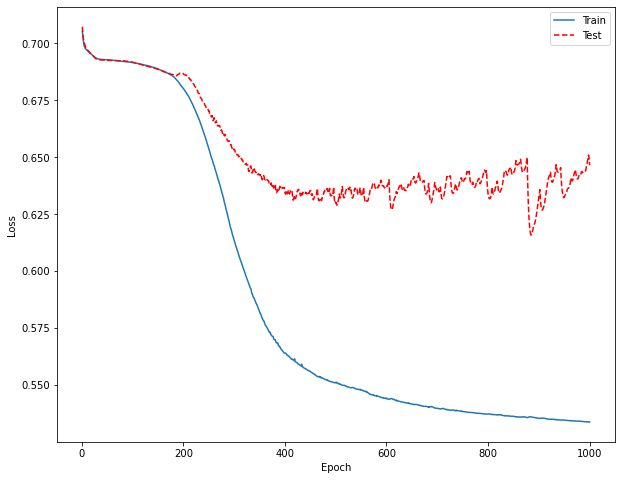

In [11]:
plt.figure(figsize=(10,8))
plt.plot(np.arange(1, epochs + 1, 1), loss_log, label='Train')
plt.plot(np.arange(1, epochs + 1, 1), test_loss_log,'r--', label='Test')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

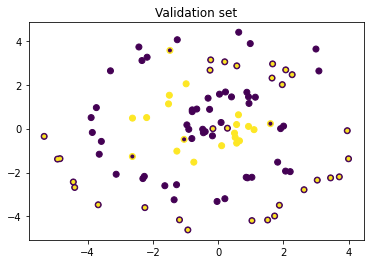

In [12]:
test_var = Variable(X_test_tensor)
net_out = net1(test_var)
labels = torch.round(net_out)
labels.shape
plt.scatter(X_test[:,0],X_test[:,1],c = labels.detach().numpy()) #Big dot is predicted value
plt.scatter(X_test[:,0],X_test[:,1],c = y_test,marker = '.') #Small dot is actual value
plt.title('Validation set')
plt.show()

In [13]:
X1 = X_test[labels[:,0] == 1]
X2 = X_test[labels[:,0] == 0]
X2.shape

(80, 2)

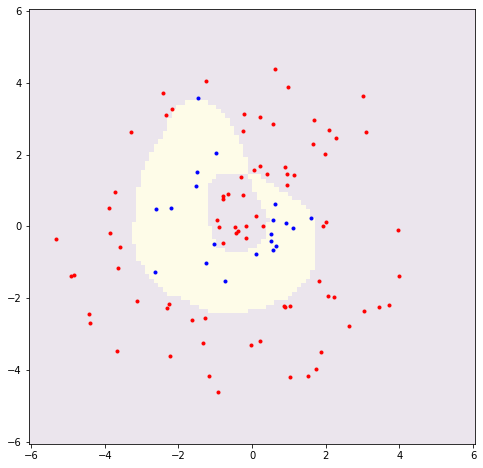

In [14]:
x_series = np.linspace(-6, 6, 100)
y_series = np.linspace(-6, 6, 100)

x_mesh, y_mesh = np.meshgrid(x_series, y_series)

x_mesh = x_mesh.reshape(-1, 1)
y_mesh = y_mesh.reshape(-1, 1)

mesh = np.append(x_mesh, y_mesh, axis=1)
# labels = torch.round(net_out)

mesh_new = np.array([mesh[:,0],mesh[:,1],
               mesh[:,0]**2,
               mesh[:,1]**2,
               mesh[:,0]*mesh[:,1],
              np.sin(mesh[:,0]),
              np.sin(mesh[:,1])]).T

net_out = net1(torch.FloatTensor(mesh_new))
y_pred = torch.round(net_out)

x_mesh = x_mesh.reshape(100, 100)
y_mesh = y_mesh.reshape(100, 100)
y_pred = y_pred.reshape(100, 100)

fig1 = plt.figure(figsize=(8,8))
plt.plot(X1[:,0],X1[:,1], 'b.')
plt.plot(X2[:,0],X2[:,1], 'r.')
plt.pcolormesh(x_mesh, y_mesh, y_pred.detach().numpy(), cmap='viridis', shading='auto', alpha=0.1)
plt.show()

## Question 4: Robot maze RL (30 points)

In class, we developed policies using Q learning and SARSA for multiple grid worlds.

Construct a maze in a 10x10 grid with a starting location in the lower left and ending location in the upper right.

Train your Q learning or SARSA agent to find the goal. Show the resulting policy in a grid representation
similar to what we developed in class.


In [15]:
# YOUR CODE GOES HERE
import numpy as np
import matplotlib.pyplot as plt

gamma = 1
s_initial = (0, 0)
s_terminal = { (9, 9): True }
s_goal = (9, 9)
n_actions = 4

def reward(s):
    if s == s_goal:
        return 100
    else:
        return -1       
        
def env(s, a):
    srow = s[0]
    scol = s[1]
    
    if a == 0:
        srow += 1
    elif a == 1:
        srow -= 1
    elif a == 2:
        scol += 1
    elif a == 3:
        scol -= 1     
    
    if srow > 9:
        srow = 9
    elif srow < 0:
        srow = 0
        
    if scol < 0:
        scol = 0
    elif scol > 9:
        scol = 9

    return (srow, scol), reward((srow, scol))

In [16]:
def epsilon_greedy(Q, s, epsilon):
    if np.random.uniform() < epsilon:
        return np.random.randint(n_actions)
    else:
        return np.argmax(Q[s])
    
def init_Q():
    Q = {}
    for srow in range(10):
        for scol in range(10):
            s = (srow, scol)
            Q[s] = [0] * n_actions
    return Q    

def learn_sarsa():
    Q = init_Q()
    n_episodes = 500
    episode_rewards = []
    for episode in range(n_episodes):
        s = s_initial
        a = epsilon_greedy(Q, s, epsilon)
        rewards = 0
        while s not in s_terminal.keys():
            sprime, r = env(s, a)
            aprime = epsilon_greedy(Q, sprime, epsilon)
            Q[s][a] = Q[s][a] + alpha * (r + gamma * Q[sprime][aprime] - Q[s][a])
            rewards += r
            s = sprime
            a = aprime
        episode_rewards.append(rewards)
    return episode_rewards, Q

alpha = 0.5
epsilon = 0.1

sarsa_rewards, sarsa_Q = learn_sarsa()

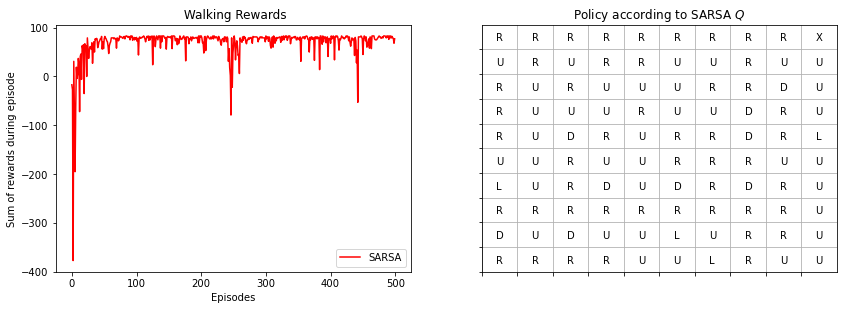

<Figure size 1008x1008 with 0 Axes>

In [17]:
def plot_policy(Q, ax, title):
    plt.xlim(0, 10)
    plt.ylim(0, 10)
    plt.xticks(np.arange(0, 10, 1))
    plt.yticks(np.arange(0, 10, 1))
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    plt.grid()
    action_names = ['U', 'D', 'R', 'L', 'X']
    for srow in range(10):
        for scol in range(10):
            s = (srow, scol)
            if s in s_terminal.keys():
                a = 4
            else:
                a = np.argmax(Q[s])
            plt.text(scol+0.4, srow+0.35, action_names[a])
    plt.title(title)
    plt.figure(figsize=(14, 14))
 
plt.figure(figsize=(14, 10))    
plt.subplot(2, 2, 1)
plt.plot(sarsa_rewards, 'r-', label='SARSA')
plt.xlabel('Episodes')
plt.ylabel('Sum of rewards during episode')
plt.title(' Walking Rewards')
plt.legend()
ax = plt.subplot(2, 2, 2)
plot_policy(sarsa_Q, ax, 'Policy according to SARSA $Q$')
plt.show()